In [ ]:
# the results of the last cell are on this drive link in the ipynb file
# https://drive.google.com/drive/folders/18lVqGwrCUnhzO7mHm67-CwfrLLS9l75c?usp=sharing

In [5]:
# importing important libraries for data cleaning, wrangling, EDA, and visualisation
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Setting options for pandas
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 110530)

# Setting options to expand the display of the dataframe
pd.set_option('display.expand_frame_repr', True)

# Setting option to prevent scilent downcasting 
pd.set_option('future.no_silent_downcasting', True)

# Housing_Price Dataset

In [7]:
# reading the dataset
df = pd.read_csv('./Housing_Price_Data_Regression_Dataset.csv')

In [8]:
# display first few rows of the dataset
df.head(20)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


In [9]:
df.shape

(545, 13)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [11]:
df.nunique()

price               219
area                284
bedrooms              6
bathrooms             4
stories               4
mainroad              2
guestroom             2
basement              2
hotwaterheating       2
airconditioning       2
parking               4
prefarea              2
furnishingstatus      3
dtype: int64

In [12]:
df.duplicated().sum()

0

In [13]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

We Find no Null data and no duplicated rows

In [14]:
# Summerizing the numirical columns in df
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,545.0,4.766729e+06,1.870440e+06,1750000.0,3430000.0,4340000.0,5740000.0,13300000.0
area,545.0,5.150541e+03,2.170141e+03,1650.0,3600.0,4600.0,6360.0,16200.0
bedrooms,545.0,2.965138e+00,7.380639e-01,1.0,2.0,3.0,3.0,6.0
bathrooms,545.0,1.286239e+00,5.024696e-01,1.0,1.0,1.0,2.0,4.0
stories,545.0,1.805505e+00,8.674925e-01,1.0,1.0,2.0,2.0,4.0
parking,545.0,6.935780e-01,8.615858e-01,0.0,0.0,0.0,1.0,3.0


In [15]:
# Summerizing the object columns in df
df.describe(include='object').T

,count,unique,top,freq
mainroad,545,2,yes,468
guestroom,545,2,no,448
basement,545,2,no,354
hotwaterheating,545,2,no,520
airconditioning,545,2,no,373
prefarea,545,2,no,417
furnishingstatus,545,3,semi-furnished,227


In [16]:
# Correlating the numerical columns in df
df.corr(numeric_only=True).round(4)

,price,area,bedrooms,bathrooms,stories,parking
price,1.0000,0.5360,0.3665,0.5175,0.4207,0.3844
area,0.5360,1.0000,0.1519,0.1938,0.0840,0.3530
bedrooms,0.3665,0.1519,1.0000,0.3739,0.4086,0.1393
bathrooms,0.5175,0.1938,0.3739,1.0000,0.3262,0.1775
stories,0.4207,0.0840,0.4086,0.3262,1.0000,0.0455
parking,0.3844,0.3530,0.1393,0.1775,0.0455,1.0000


The highest Correlation is about 0.5 so numerically all features are needed

In [17]:
for col in df.columns:
    print(f'{col}: {df[col].unique()[:6]}')

price: [13300000 12250000 12215000 11410000 10850000 10150000]
area: [ 7420  8960  9960  7500  8580 16200]
bedrooms: [4 3 5 2 6 1]
bathrooms: [2 4 1 3]
stories: [3 4 2 1]
mainroad: ['yes' 'no']
guestroom: ['no' 'yes']
basement: ['no' 'yes']
hotwaterheating: ['no' 'yes']
airconditioning: ['yes' 'no']
parking: [2 3 0 1]
prefarea: ['yes' 'no']
furnishingstatus: ['furnished' 'semi-furnished' 'unfurnished']


In [18]:
# Creating a new meter_price column
df['meter_price'] = df['price'] / df['area']

In [19]:
# To detect outliers, we can use the IQR method. First, we will calculate the IQR for the numerical columns.

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df.quantile(0.25, numeric_only=True)
Q3 = df.quantile(0.75, numeric_only=True)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Create a boolean DataFrame indicating outliers
# we must select numbers only because if used df alone it includes all columns numrical and categorical
outliers = (df.select_dtypes(include='number') < lower_bound) | (df.select_dtypes(include='number') > upper_bound)

# Count the number of outliers in each numerical column
outlier_counts = outliers.sum()

# Prepare the output
outlier_counts

price          15
area           12
bedrooms       12
bathrooms       1
stories        41
parking        12
meter_price    11
dtype: int64

As it seams the outliers are logical so we will leave them as it may have a relation to other features than price per meter

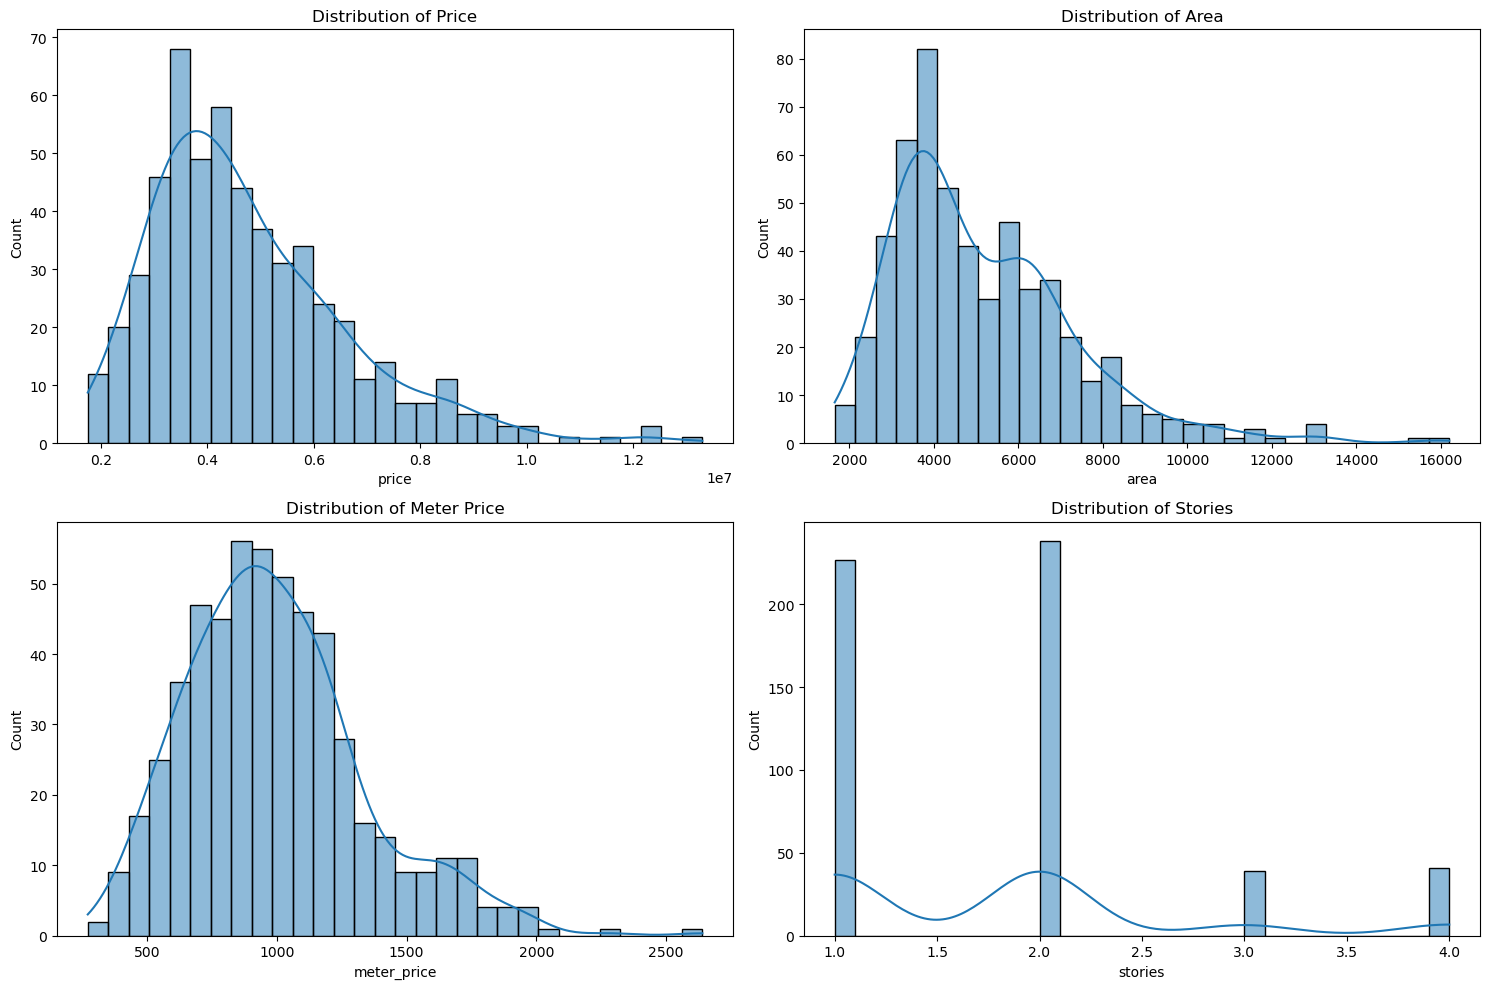

In [20]:
# EDA: Visualizing the distribution of numerical columns
# Histogram for 'price', 'area', 'meter_price', and 'stories'
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.histplot(df['price'], bins=30, kde=True)
plt.title('Distribution of Price')

plt.subplot(2, 2, 2)
sns.histplot(df['area'], bins=30, kde=True)
plt.title('Distribution of Area')

plt.subplot(2, 2, 3)
sns.histplot(df['meter_price'], bins=30, kde=True)
plt.title('Distribution of Meter Price')

plt.subplot(2, 2, 4)
sns.histplot(df['stories'], bins=30, kde=True)
plt.title('Distribution of Stories')

plt.tight_layout()
plt.show()


Categorical columns: Index(['mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'prefarea', 'furnishingstatus'],
      dtype='object')


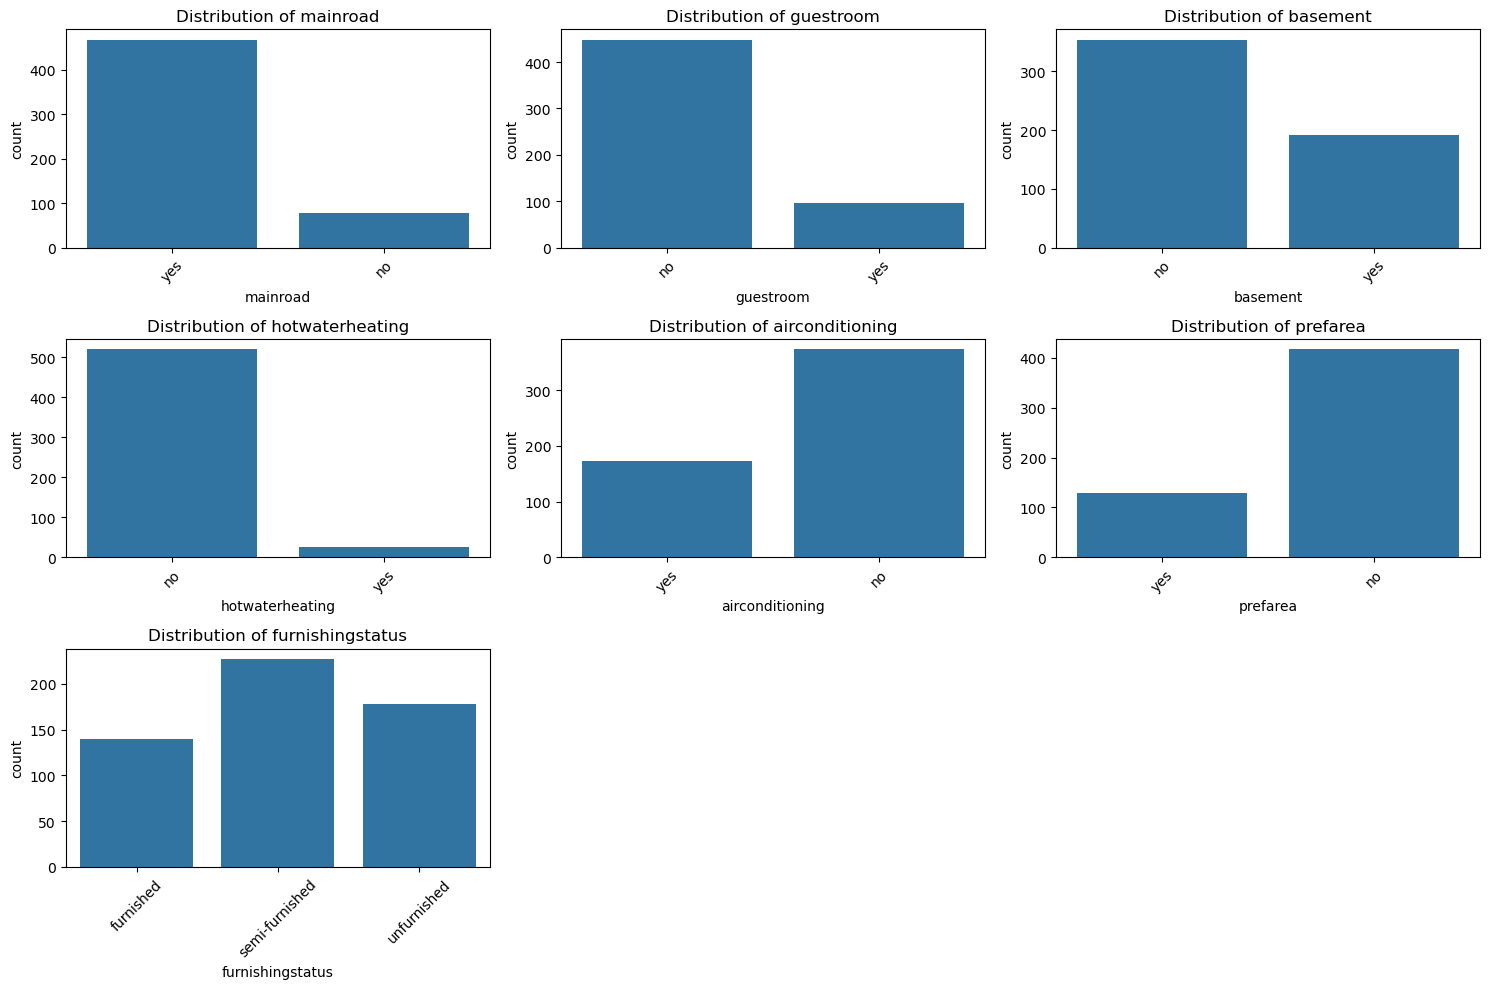

In [21]:
# Bar plots for categorical columns in subplots
categorical_columns = df.select_dtypes(include='object').columns
print(f'Categorical columns: {categorical_columns}')
plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(3, 3, i)
    sns.countplot(data=df, x=col)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

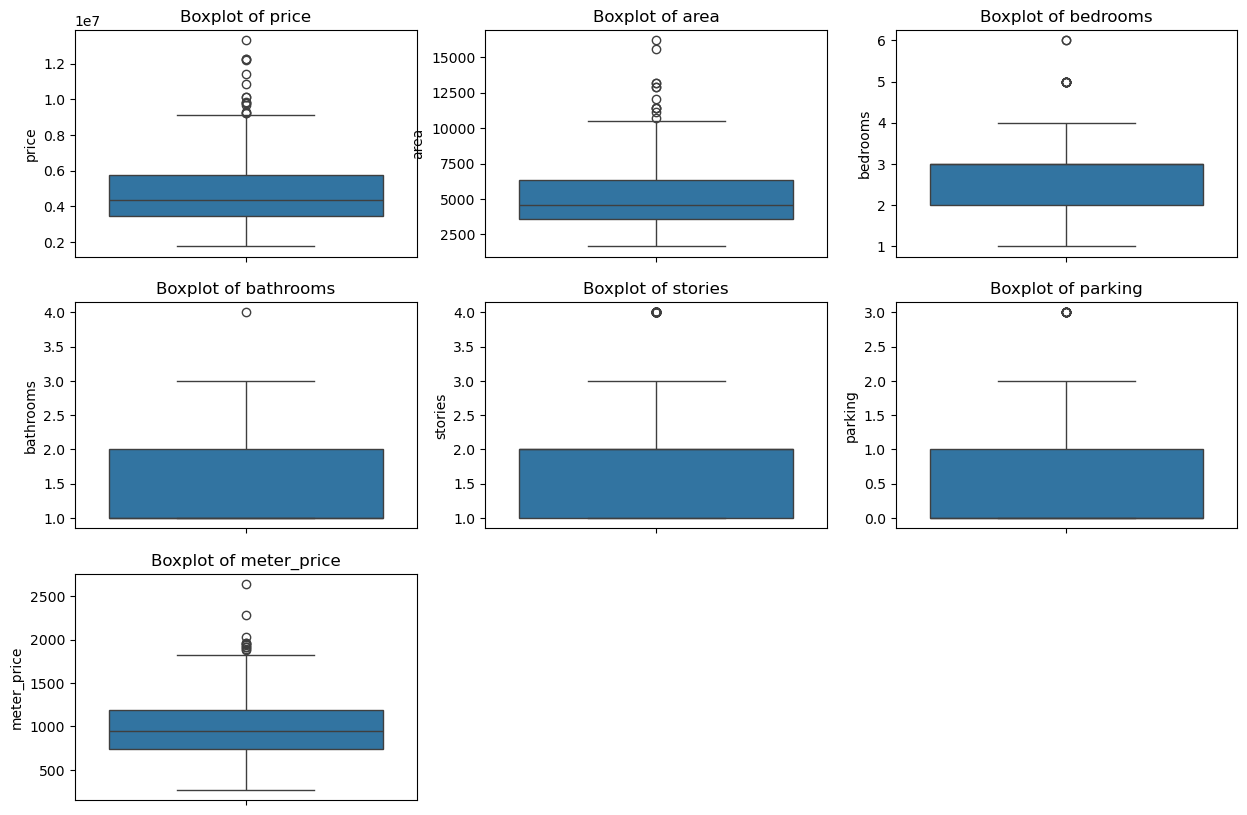

In [22]:
# Boxplots: Outlier detection per numerical variable in subplots
plt.figure(figsize=(15, 10))
for i, col in enumerate(df.select_dtypes(include='number').columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=df, y=col)
    plt.title(f'Boxplot of {col}')


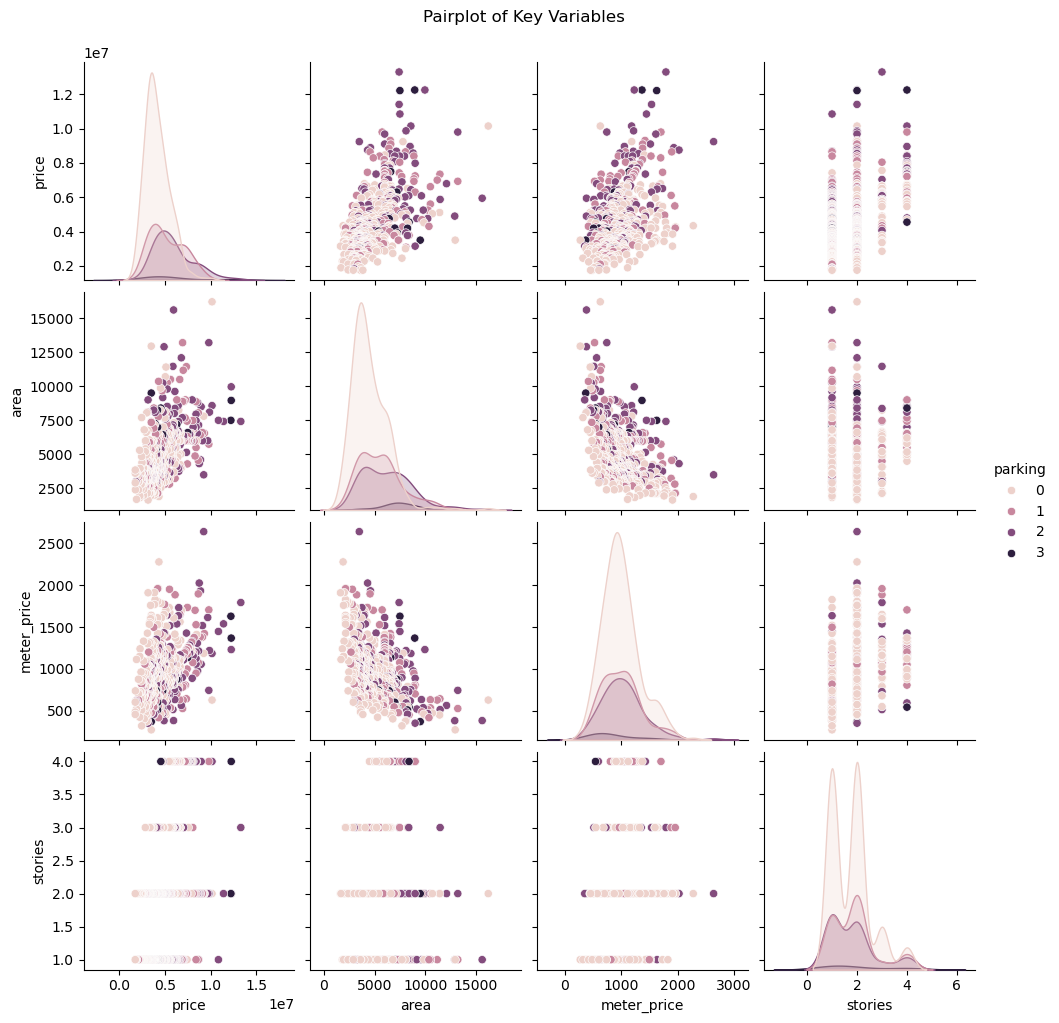

In [23]:
# Pairplot: Visualize relationships between key variables
sns.pairplot(df, vars=['price', 'area', 'meter_price', 'stories'], hue='parking')
plt.suptitle('Pairplot of Key Variables', y=1.02)
plt.show()

In [24]:
# Feature Engineering: encoding categorical variables
# Convert categorical variables to numerical using one-hot encoding
df = pd.get_dummies(df, drop_first=True)

# Display the first few rows of the modified DataFrame
df.head()

,price,area,bedrooms,bathrooms,stories,parking,meter_price,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,1792.452830,True,False,False,False,True,True,False,False
1,12250000,8960,4,4,4,3,1367.187500,True,False,False,False,True,False,False,False
2,12250000,9960,3,2,2,2,1229.919679,True,False,True,False,False,True,True,False
3,12215000,7500,4,2,2,3,1628.666667,True,False,True,False,True,True,False,False
4,11410000,7420,4,1,2,2,1537.735849,True,True,True,False,True,False,False,False


In [25]:
# Now for machine learning, we will import the necessary libraries
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

# preparing the data for machine learning
X = df.drop(columns=['price', 'meter_price'])
y = df['price']

# Splitting the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the features because some algorithms are sensitive to the scale of the data
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [26]:
# Using defferent regression models to predict the price
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 1. Linear Regression
linear_model = LinearRegression()
print("Fitting Linear Regression model...")
linear_model.fit(x_train, y_train)
y_pred_linear = linear_model.predict(x_test)
print(
f"""
Linear Regression Metrics:
mean squared error: {mean_squared_error(y_test, y_pred_linear)},
mean absolute error: {mean_absolute_error(y_test, y_pred_linear)},
r2 score: {r2_score(y_test, y_pred_linear)}
"""
)

# 2. Ridge Regression
ridge = Ridge()
ridge_params = {'alpha': [0.1, 1, 10, 100]}
# n-jobs=-1 allows the use of all available CPU cores for parallel processing
ridge_grid = GridSearchCV(ridge, ridge_params, cv=5, scoring='r2', n_jobs=-1)
print("Fitting Ridge Regression model...\n")
ridge_grid.fit(x_train, y_train)
print(f"Best parameters for Ridge Regression: {ridge_grid.best_params_}")
y_pred_ridge = ridge_grid.predict(x_test)
print(
f"""
Ridge Regression Metrics:
mean squared error: {mean_squared_error(y_test, y_pred_ridge)},
mean absolute error: {mean_absolute_error(y_test, y_pred_ridge)},
r2 score: {r2_score(y_test, y_pred_ridge)}
"""
)

# 3. Lasso Regression
lasso = Lasso(max_iter=10000)  # Increasing max_iter for convergence
lasso_params = {'alpha': [0.1, 1, 10, 100]}
lasso_grid = GridSearchCV(lasso, lasso_params, cv=5, scoring='r2', n_jobs=-1)
print("Fitting Lasso Regression model...\n")
lasso_grid.fit(x_train, y_train)
print(f"Best parameters for Lasso Regression: {lasso_grid.best_params_}\n")
y_pred_lasso = lasso_grid.predict(x_test)
print(
f"""Lasso Regression Metrics:
mean squared error: {mean_squared_error(y_test, y_pred_lasso)},
mean absolute error: {mean_absolute_error(y_test, y_pred_lasso)},
r2 score: {r2_score(y_test, y_pred_lasso)}
"""
)

Fitting Linear Regression model...

Linear Regression Metrics:
mean squared error: 1754318687330.668,
mean absolute error: 970043.4039201642,
r2 score: 0.6529242642153176

Fitting Ridge Regression model...

Best parameters for Ridge Regression: {'alpha': 10}

Ridge Regression Metrics:
mean squared error: 1760077525667.375,
mean absolute error: 968319.3725442473,
r2 score: 0.6517849312837287

Fitting Lasso Regression model...

Best parameters for Lasso Regression: {'alpha': 100}

Lasso Regression Metrics:
mean squared error: 1754449554813.0508,
mean absolute error: 970043.8781367206,
r2 score: 0.652898373293636



In [28]:
# 4. Decision Tree Regression
dt = DecisionTreeRegressor()
dt_params = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'criterion': ['squared_error', 'absolute_error']
    }

dt_grid = GridSearchCV(dt, dt_params, cv=5, scoring='r2', n_jobs=-1)
print("Fitting Decision Tree Regression model...\n")
dt_grid.fit(x_train, y_train)
print(f"Best parameters for Decision Tree Regression: {dt_grid.best_params_}\n")
y_pred_dt = dt_grid.predict(x_test)
print(
f"""Decision Tree Regression Metrics:
mean squared error: {mean_squared_error(y_test, y_pred_dt)},
mean absolute error: {mean_absolute_error(y_test, y_pred_dt)},
r2 score: {r2_score(y_test, y_pred_dt)}
"""
)

# 5. Random Forest Regression
rf = RandomForestRegressor()
rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10]
}
rf_grid = GridSearchCV(rf, rf_params, cv=5, scoring='r2', n_jobs=-1)
print("Fitting Random Forest Regression model...\n")
rf_grid.fit(x_train, y_train)
print(f"Best parameters for Random Forest Regression: {rf_grid.best_params_}\n")
y_pred_rf = rf_grid.predict(x_test)
print(
f'''Random Forest Regression Metrics:
mean squared error: {mean_squared_error(y_test, y_pred_rf)},
mean absolute error: {mean_absolute_error(y_test, y_pred_rf)},
r2 score: {r2_score(y_test, y_pred_rf)}
'''
)

# 6. Gradient Boosting Regression
gb = GradientBoostingRegressor()
gb_params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}
gb_grid = GridSearchCV(gb, gb_params, cv=5, scoring='r2', n_jobs=-1)
print("Fitting Gradient Boosting Regression model...\n")
gb_grid.fit(x_train, y_train)
print(f"Best parameters for Gradient Boosting Regression: {gb_grid.best_params_}\n")
y_pred_gb = gb_grid.predict(x_test)
print(
f'''Gradient Boosting Regression Metrics:
mean squared error: {mean_squared_error(y_test, y_pred_gb)},
mean absolute error: {mean_absolute_error(y_test, y_pred_gb)},
r2 score: {r2_score(y_test, y_pred_gb)}
'''
)

# 7. K-Nearest Neighbors Regression
knn = KNeighborsRegressor()
knn_params = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}
knn_grid = GridSearchCV(knn, knn_params, cv=5, scoring='r2', n_jobs=-1)
print("Fitting K-Nearest Neighbors Regression model...\n")
knn_grid.fit(x_train, y_train)
y_pred_knn = knn_grid.predict(x_test)
print(
f'''K-Nearest Neighbor Metrics:
mean squared error: {mean_squared_error(y_test, y_pred_knn)},
mean absolute error: {mean_absolute_error(y_test, y_pred_knn)},
r2 score: {r2_score(y_test, y_pred_knn)}
'''
)

Fitting Decision Tree Regression model...

Best parameters for Decision Tree Regression: {'criterion': 'squared_error', 'max_depth': 5, 'min_samples_split': 10}

Decision Tree Regression Metrics:
mean squared error: 2855008998054.195,
mean absolute error: 1258020.5784613148,
r2 score: 0.43516286075747923

Fitting Random Forest Regression model...

Best parameters for Random Forest Regression: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 100}

Random Forest Regression Metrics:
mean squared error: 2018837369913.9575,
mean absolute error: 1030170.7986191793,
r2 score: 0.6005916880138504

Fitting Gradient Boosting Regression model...

Best parameters for Gradient Boosting Regression: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}

Gradient Boosting Regression Metrics:
mean squared error: 1752741558361.9736,
mean absolute error: 978067.2482377237,
r2 score: 0.6532362846031696

Fitting K-Nearest Neighbors Regression model...

K-Nearest Neighbor Metrics:
mean squared

# Customer_churn_dataset

In [54]:
# read csv file
df_churn = pd.read_csv('./customer_churn_dataset_classification_dataset.csv')

In [55]:
df_churn.head(20)

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0
5,8.0,51.0,Male,33.0,25.0,9.0,26.0,Premium,Annual,129.0,8.0,1.0
6,9.0,58.0,Female,49.0,12.0,3.0,16.0,Standard,Quarterly,821.0,24.0,1.0
7,10.0,55.0,Female,37.0,8.0,4.0,15.0,Premium,Annual,445.0,30.0,1.0
8,11.0,39.0,Male,12.0,5.0,7.0,4.0,Standard,Quarterly,969.0,13.0,1.0
9,12.0,64.0,Female,3.0,25.0,2.0,11.0,Standard,Quarterly,415.0,29.0,1.0


In [56]:
df_churn.shape

(440833, 12)

In [57]:
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440833 entries, 0 to 440832
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         440832 non-null  float64
 1   Age                440832 non-null  float64
 2   Gender             440832 non-null  object 
 3   Tenure             440832 non-null  float64
 4   Usage Frequency    440832 non-null  float64
 5   Support Calls      440832 non-null  float64
 6   Payment Delay      440832 non-null  float64
 7   Subscription Type  440832 non-null  object 
 8   Contract Length    440832 non-null  object 
 9   Total Spend        440832 non-null  float64
 10  Last Interaction   440832 non-null  float64
 11  Churn              440832 non-null  float64
dtypes: float64(9), object(3)
memory usage: 40.4+ MB


In [58]:
df_churn.isnull().sum()

CustomerID           1
Age                  1
Gender               1
Tenure               1
Usage Frequency      1
Support Calls        1
Payment Delay        1
Subscription Type    1
Contract Length      1
Total Spend          1
Last Interaction     1
Churn                1
dtype: int64

In [59]:
df_churn.dropna(inplace=True)

In [60]:
df_churn.isnull().sum()

CustomerID           0
Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64

In [61]:
df_churn.duplicated().sum()

0

In [62]:
df_churn.nunique()

CustomerID           440832
Age                      48
Gender                    2
Tenure                   60
Usage Frequency          30
Support Calls            11
Payment Delay            31
Subscription Type         3
Contract Length           3
Total Spend           68363
Last Interaction         30
Churn                     2
dtype: int64

In [63]:
# Summarizing the Categorical columns
df_churn.describe(include=['object']).T

,count,unique,top,freq
Gender,440832,2,Male,250252
Subscription Type,440832,3,Standard,149128
Contract Length,440832,3,Annual,177198


In [64]:
# Summarizing the numerical columns
df_churn.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,440832.0,225398.667955,129531.918550,2.0,113621.75,226125.5,337739.25,449999.0
Age,440832.0,39.373153,12.442369,18.0,29.00,39.0,48.00,65.0
Tenure,440832.0,31.256336,17.255727,1.0,16.00,32.0,46.00,60.0
Usage Frequency,440832.0,15.807494,8.586242,1.0,9.00,16.0,23.00,30.0
Support Calls,440832.0,3.604437,3.070218,0.0,1.00,3.0,6.00,10.0
Payment Delay,440832.0,12.965722,8.258063,0.0,6.00,12.0,19.00,30.0
Total Spend,440832.0,631.616223,240.803001,100.0,480.00,661.0,830.00,1000.0
Last Interaction,440832.0,14.480868,8.596208,1.0,7.00,14.0,22.00,30.0
Churn,440832.0,0.567107,0.495477,0.0,0.00,1.0,1.00,1.0


In [65]:
df_churn.corr(numeric_only=True)

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
CustomerID,1.000000,-0.181977,0.044129,0.038455,-0.482894,-0.262029,0.359289,-0.125356,-0.839365
Age,-0.181977,1.000000,-0.011630,-0.007190,0.158451,0.061738,-0.084684,0.028980,0.218394
Tenure,0.044129,-0.011630,1.000000,-0.026800,-0.027640,-0.016588,0.019006,-0.006903,-0.051919
Usage Frequency,0.038455,-0.007190,-0.026800,1.000000,-0.022013,-0.014470,0.018631,-0.004662,-0.046101
Support Calls,-0.482894,0.158451,-0.027640,-0.022013,1.000000,0.162889,-0.221594,0.077684,0.574267
Payment Delay,-0.262029,0.061738,-0.016588,-0.014470,0.162889,1.000000,-0.121044,0.042708,0.312129
Total Spend,0.359289,-0.084684,0.019006,0.018631,-0.221594,-0.121044,1.000000,-0.056890,-0.429355
Last Interaction,-0.125356,0.028980,-0.006903,-0.004662,0.077684,0.042708,-0.056890,1.000000,0.149616
Churn,-0.839365,0.218394,-0.051919,-0.046101,0.574267,0.312129,-0.429355,0.149616,1.000000


In [66]:
# Dropping CustomerID since it has no real value or meaning in our analysis
df_churn = df_churn.drop('CustomerID', axis=1)
df_churn.head()

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [ ]:
# Changing data types from float64 to int64 since all values are whole numbers 
df_churn[df_churn.select_dtypes(include='float64').columns] = df_churn.select_dtypes(include='float64').round().astype('int64')

In [71]:
# Displaying the first 5 unique values of each column to understand the data better
for col in df_churn.columns:
    print(f'{col}: {df_churn[col].unique()[:5]}')

Age: [30 65 55 58 23]
Gender: ['Female' 'Male']
Tenure: [39 49 14 38 32]
Usage Frequency: [14  1  4 21 20]
Support Calls: [ 5 10  6  7  9]
Payment Delay: [18  8  7 26 16]
Subscription Type: ['Standard' 'Basic' 'Premium']
Contract Length: ['Annual' 'Monthly' 'Quarterly']
Total Spend: [932 557 185 396 617]
Last Interaction: [17  6  3 29 20]
Churn: [1 0]


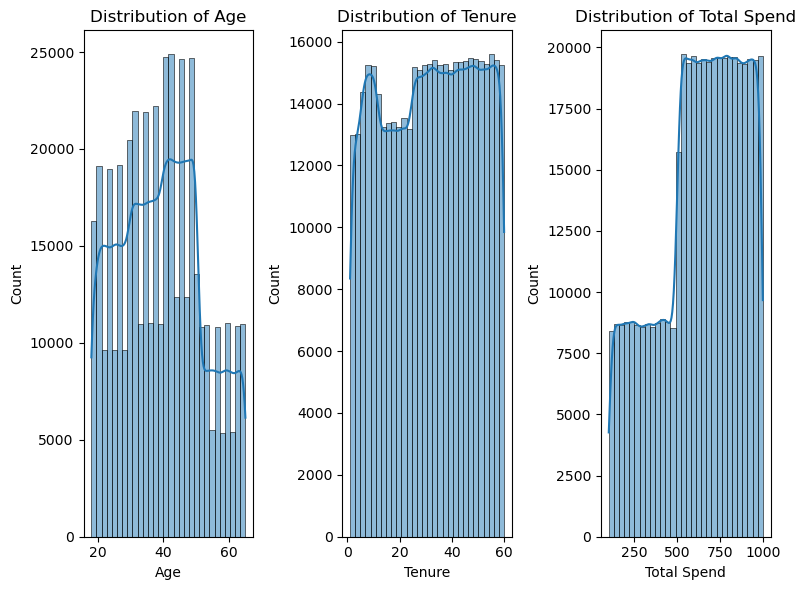

In [74]:
# EDA: Visualizing the distribution of numerical columns
# Histogram for 'Age', 'Tenure', 'Total Spend'
plt.figure(figsize=(8, 6))

plt.subplot(1, 3, 1)
sns.histplot(df_churn['Age'], bins=30, kde=True)
plt.title('Distribution of Age')

plt.subplot(1, 3, 2)
sns.histplot(df_churn['Tenure'], bins=30, kde=True)
plt.title('Distribution of Tenure')

plt.subplot(1, 3, 3)
sns.histplot(df_churn['Total Spend'], bins=30, kde=True)
plt.title('Distribution of Total Spend')

plt.tight_layout()
plt.show()


Categorical columns: Index(['Gender', 'Subscription Type', 'Contract Length'], dtype='object')


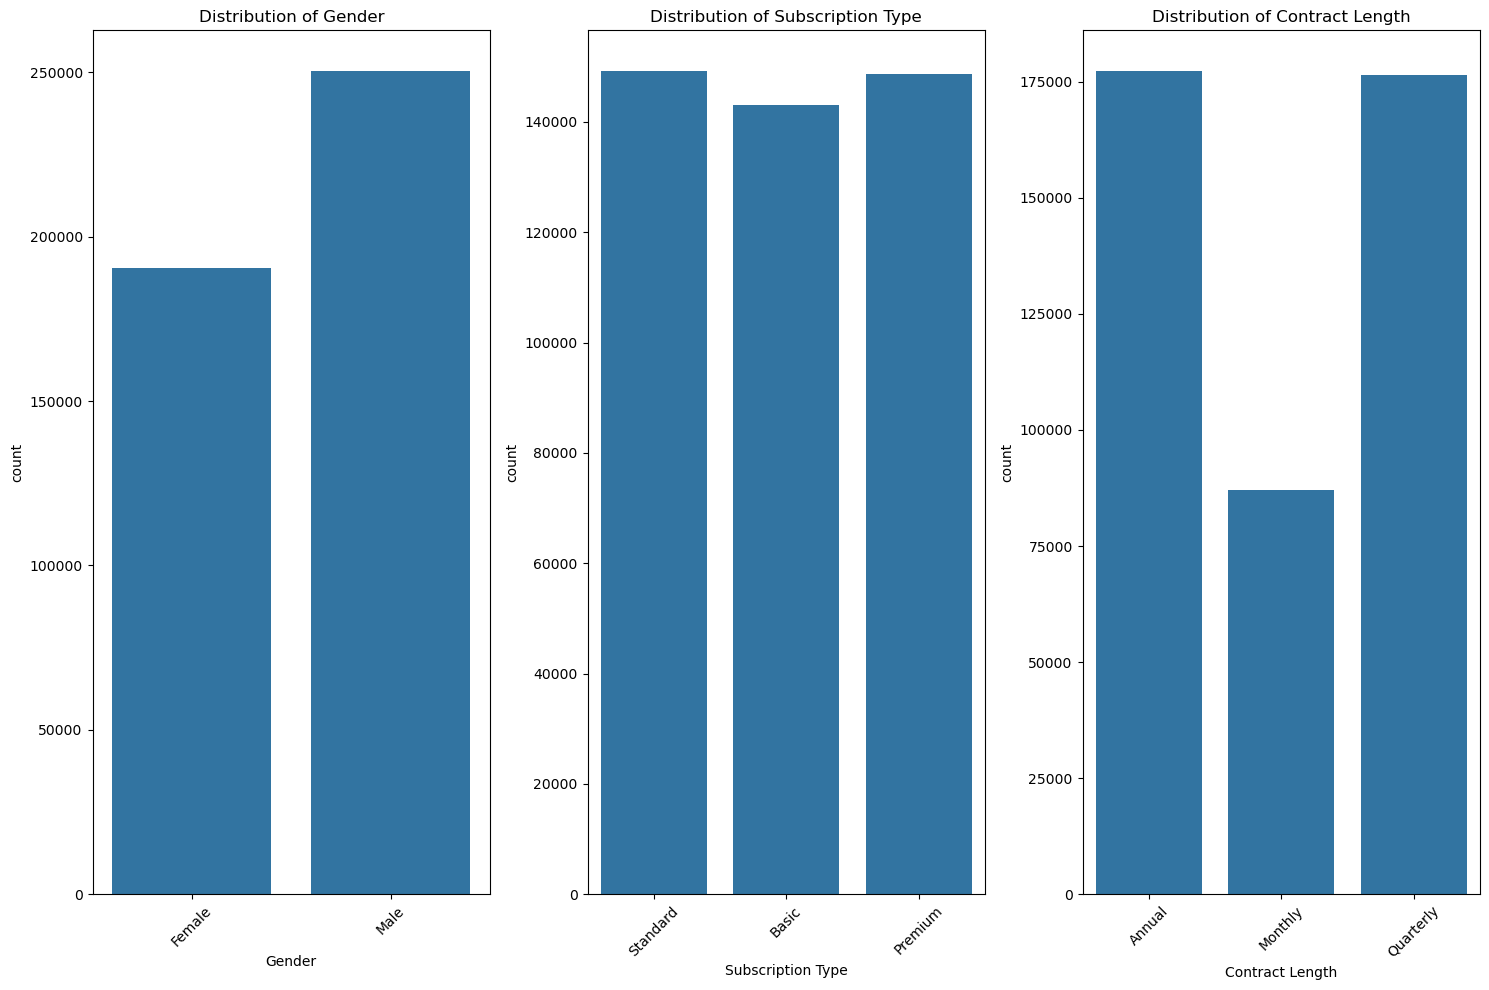

In [77]:
# Bar plots for categorical columns in subplots
churn_categorical_columns = df_churn.select_dtypes(include='object').columns
print(f'Categorical columns: {churn_categorical_columns}')
plt.figure(figsize=(15, 10))
for i, col in enumerate(churn_categorical_columns, 1):
    plt.subplot(1, 3, i)
    sns.countplot(data=df_churn, x=col)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

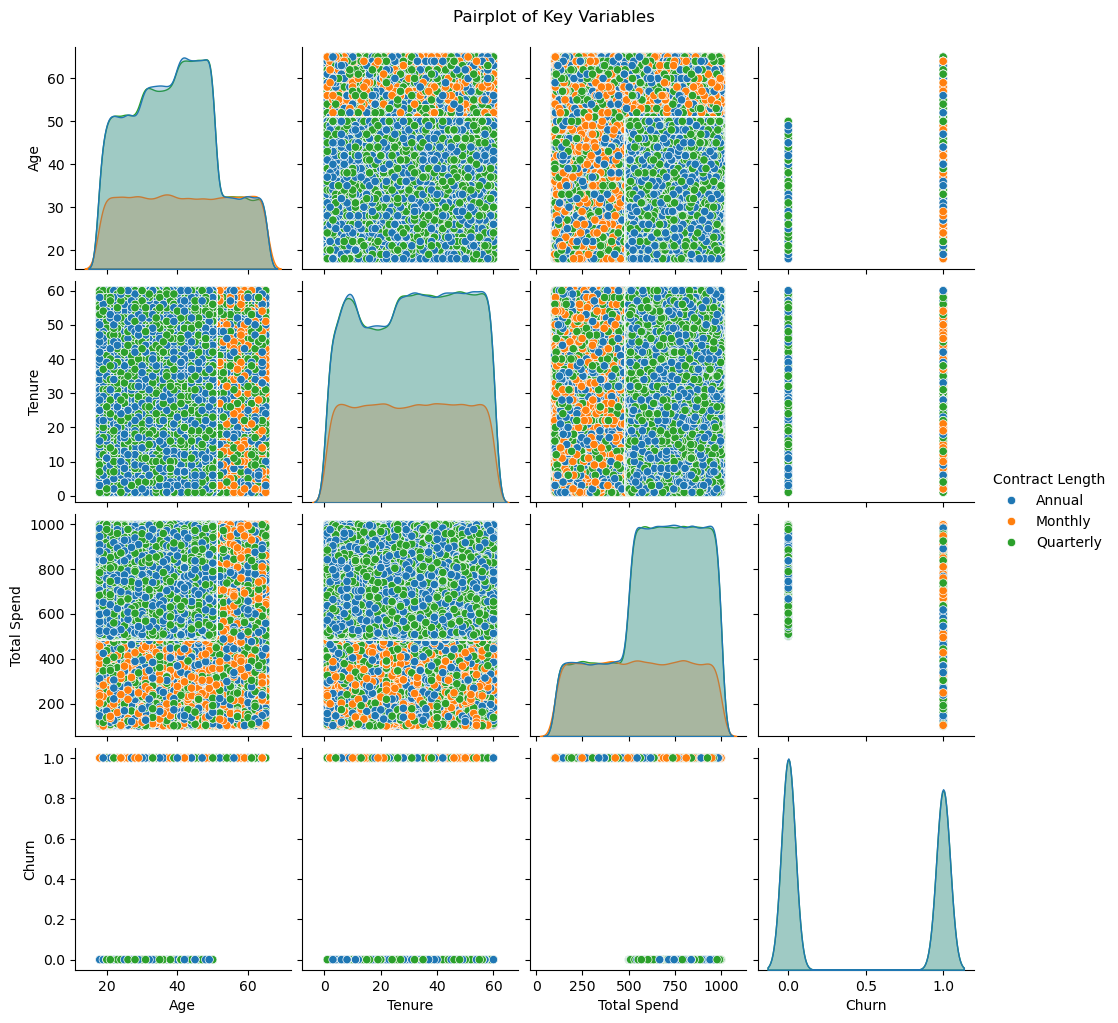

In [80]:
# Pairplot: Visualize relationships between key variables
sns.pairplot(df_churn, vars=['Age', 'Tenure', 'Total Spend', 'Churn'], hue='Contract Length', diag_kind='kde')
plt.suptitle('Pairplot of Key Variables', y=1.02)
plt.show()

Feature Engineering

In [85]:
df_churn = pd.get_dummies(df_churn, drop_first=True)
df_churn.head()

,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn,Gender_Male,Subscription Type_Premium,Subscription Type_Standard,Contract Length_Monthly,Contract Length_Quarterly
0,30,39,14,5,18,932,17,1,False,False,True,False,False
1,65,49,1,10,8,557,6,1,False,False,False,True,False
2,55,14,4,6,18,185,3,1,False,False,False,False,True
3,58,38,21,7,7,396,29,1,True,False,True,True,False
4,23,32,20,5,8,617,20,1,True,False,False,True,False


### Applying ML models for Classification

In [86]:
x_churn = X = df_churn.drop(columns=['Churn'])
y_churn = df_churn['Churn']

# Split data
x_churn_train, x_churn_test, y_churn_train, y_churn_test = train_test_split(x_churn, y_churn, test_size=0.2, random_state=42)

# Scale data
x_churn_train = scaler.fit_transform(x_churn_train)
x_churn_test = scaler.transform(x_churn_test)

In [87]:
# Importing all needed lib
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB

# Import used metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [91]:
# 1.KNN Classifier
knnc = KNeighborsClassifier()
knnc_params = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance']
}
knnc_grid = GridSearchCV(knnc, knnc_params, cv=5, scoring='accuracy', n_jobs=-1)
print('fitting knn model...\n')
knnc_grid.fit(x_churn_train, y_churn_train)
print(
    f'KNN best Paramaters: {knnc_grid.best_params_}'
)
y_pred_knnc = knnc_grid.predict(x_churn_test)
print(
f'''KNN Accuracy: {accuracy_score(y_churn_test, y_pred_knnc)}
confusion matrix: {confusion_matrix(y_churn_test, y_pred_knnc)}
classification_report: {classification_report(y_churn_test, y_pred_knnc)}
'''
)

# 2. Logestic Regression
lgr = LogisticRegression()
lgr_params = {
    'C': [0.1, 1.0, 10],
    'penalty': ['l2'],
    'solver': ['lbfgs']
}
lgr_grid = GridSearchCV(lgr, lgr_params, cv=5, scoring='accuracy', n_jobs=-1)
print(
    'Fitting Linear Regression Classifier...\n'
)
lgr_grid.fit(x_churn_train, y_churn_train)
print(f'logestic regression best paramaters: {lgr_grid.best_params_}')

y_pred_lgr = lgr_grid.predict(x_churn_test)
print(
f'''logestic regression Accuracy: {accuracy_score(y_churn_test, y_pred_lgr)}
confusion matrix: {confusion_matrix(y_churn_test, y_pred_lgr)}
classification_report: {classification_report(y_churn_test, y_pred_lgr)}
'''
)

# 3. Decision Tree
dtc = DecisionTreeClassifier()
dtc_params = {
    'max_depth': [3, 5, 10],
    'criterion': ['gini', 'entropy']
}
dtc_grid = GridSearchCV(dtc, dtc_params, cv=5, scoring='accuracy', n_jobs=-1)
print('Fitting Decision Tree Classifier...\n')
dtc_grid.fit(x_churn_train, y_churn_train)
print(f'Decision Tree best parameters: {dtc_grid.best_params_}')

y_pred_dtc = dtc_grid.predict(x_churn_test)
print(
f'''Decision Tree Accuracy: {accuracy_score(y_churn_test, y_pred_dtc)}
confusion matrix: {confusion_matrix(y_churn_test, y_pred_dtc)}
classification_report: {classification_report(y_churn_test, y_pred_dtc)}
'''
)

# 4. Random Forest Classifier
rfc = RandomForestClassifier()
rfc_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10]
}
rfc_grid = GridSearchCV(rfc, rfc_params, cv=5, scoring='accuracy', n_jobs=-1)
print('Fitting Random forest Classifier...\n')

rfc_grid.fit(x_churn_train, y_churn_train)
print(f'Random Forest Best Paramaters: {rfc_grid.best_params_}')

y_pred_rfc = rfc_grid.predict(x_churn_test)
print(
f'''Random Forest Accuracy: {accuracy_score(y_churn_test, y_pred_rfc)}
confusion matrix: {confusion_matrix(y_churn_test, y_pred_rfc)}
classification_report: {classification_report(y_churn_test, y_pred_rfc)}
'''
)

# 5. Gradient Boosting Classifier
gbc = GradientBoostingClassifier()
gbc_params = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5]
}
gbc_grid = GridSearchCV(gbc, gbc_params, cv=5, scoring='accuracy', n_jobs=-1)
print('Fitting Gradient Boosting Classifier Model...\n')

gbc_grid.fit(x_churn_train, y_churn_train)
print(f'Gradient Boosting Classifier best paramaters: {gbc_grid.best_params_}')

y_pred_gbc = gbc_grid.predict(x_churn_test)

print(
f'''Gradient Boosting Classifier Accuracy: {accuracy_score(y_churn_test, y_pred_gbc)}
confusion matrix: {confusion_matrix(y_churn_test, y_pred_gbc)}
classification_report: {classification_report(y_churn_test, y_pred_gbc)}
'''
)

# 6. Naive Bayes
nb = GaussianNB()
print('Fitting Naive Bayes Model...\n')
nb.fit(x_churn_train, y_churn_train)

y_pred_nb = nb.predict(x_churn_test)
print(
f'''Naive Bayes Accuracy: {accuracy_score(y_churn_test, y_pred_nb)}
confusion matrix: {confusion_matrix(y_churn_test, y_pred_nb)}
classification_report: {classification_report(y_churn_test, y_pred_nb)}
'''
)

fitting knn model...

KNN best Paramaters: {'n_neighbors': 3, 'weights': 'distance'}
KNN Accuracy: 0.9607903183730875
confusion matrix: [[37860   203]
 [ 3254 46850]]
classification_report:               precision    recall  f1-score   support

           0       0.92      0.99      0.96     38063
           1       1.00      0.94      0.96     50104

    accuracy                           0.96     88167
   macro avg       0.96      0.96      0.96     88167
weighted avg       0.96      0.96      0.96     88167


Fitting Linear Regression Classifier...

logestic regression best paramaters: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
logestic regression Accuracy: 0.8964351741581317
confusion matrix: [[34561  3502]
 [ 5629 44475]]
classification_report:               precision    recall  f1-score   support

           0       0.86      0.91      0.88     38063
           1       0.93      0.89      0.91     50104

    accuracy                           0.90     88167
   macro avg       